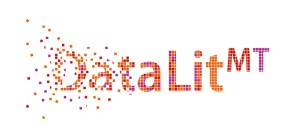

#Data Evaluation: Machine Translationese & Post-Editese – Advanced Level
**How MT integration affects the target texts we produce**

# Introduction

Neural machine translation (NMT) systems are increasingly employed in the professional translation process to increase productivity. This is evidenced, for example, by the results of the annual [European Language Industry Survey (ELIS)](https://elis-survey.org/), a joint initiative by international associations and organizations from the language industry. On average, NMT achieves a higher output quality than previous MT architectures (cf. [Bentivogli et al. 2016](https://aclanthology.org/D16-1025/)) and some developers even claim that their systems have achieved human parity ([Hassan et al. 2018](https://arxiv.org/abs/1803.05567)) or even a superhuman performance ([Popel et al. 2020](https://www.nature.com/articles/s41467-020-18073-9)). However, there is good reason to be sceptical of such claims, not least because other studies found that the output of NMT systems can be “deceptively fluent” ([Way 2018](https://link.springer.com/chapter/10.1007/978-3-319-91241-7_8)), meaning that translations produced by an NMT system often read very well but may actually contain errors/inadequacies such as critical shifts in content (e.g. omissions, additions, inverted negations) or expressions and terms that are inappropriate for the text type or unfamiliar to the target audience. This deceptive fluency of NMT output poses a challenge to (future) professional translators and post-editors since it tempts them to simply adopt the translation suggestions provided by the system, making it harder for them to discover and correct issues such as those discussed above. 

In this notebook, we will show you how you can perform a fine-grained analysis of raw (unedited) MT output, post-edited MT output and human translations produced from scratch (i.e., without MT assistance) in order to identify nuanced differences between the three models of text production. Along the way, you will gain knowledge and skills in the sub-dimensions of *Data Evaluation* of the [DataLit<sup>MT</sup> Competence Matrix](https://itmk.github.io/The-DataLitMT-Project/matrix/).

**Basic concepts: translationese, machine translationese & post-editese**

Human translations (HTs) have been found to exhibit linguistic features that differentiate them from their source texts and from texts originally produced in the target language. These features are also referred to as *laws of translation*, *translation universals* or *translationese* (cf. [Mauranen/Kujamäki 2004](https://benjamins.com/catalog/btl.48)) and include the following phenomena: 

*   *simplification* (translations are assumed to be lexically, syntactically or stylistically simpler than their source texts)
*   *normalisation*/*homogenisation* (translations are assumed to be more conventional in their use of language than their source texts)
*   *explicitation* (ambiguous or implicit source text passages often rendered in a less ambiguos/more explicit manner in the translation)
*   *interference* (translating the source text more or less literally)

Interestingly, MT output also shows typical tendencies distinguishing it from its source texts, from human from-scratch translations and from texts originally produced in the target language, which is described as *machine translationese* (cf. [Vanmassenhove et al. 2021](https://aclanthology.org/2021.eacl-main.188/)). For example, Vanmassenhove et al. (2021) found a decreased lexical richness in NMT output compared to the corresponding source texts, a phenomenon which the authors call “artificially impoverished language”. Also, when NMT systems encounter text that is not reflected in their training data, they often resort to a rather linear translation of the source text (cf. [Ahrenberg 2017](https://www.acl-bg.org/proceedings/2017/RANLP_W3%202017/pdf/HiT-IT003.pdf)). So, raw MT output is assumed to be artificially impoverished and to show signs of source text interference.

Post-edited MT output (MTPE) also exhibits patterns which differentiate it from human from-scratch translations, which is called *post-editese* (cf. [Toral 2019](https://aclanthology.org/W19-6627/)). Specifically, Toral (2019) found post-edited MT output to be lexically simpler and closer in sentence length and part-of-speech sequences to its source texts than human from-scratch translations. Patterns present in the MT output (machine translationese) can therefore be reflected in post-edited versions of this output (although often to a lesser degree).

**Priming**

*Priming* is a psychological effect that unconsciously influences the way we perform a task based on something we’ve experienced before (cf. [Carl/Schaeffer 2019](https://link.springer.com/chapter/10.1007/978-981-13-1984-6_3)). This may cause us to reproduce what we’ve experienced or to perform the task faster, perhaps putting less cognitive effort into it. 

Priming effects have been identified in both HTs from scratch (priming by the source text, resulting in translationese) and in post-edited MT output (priming by the raw MT output, resulting in post-editese). It is important to note, however, that these effects are stronger in post-editing than in HT. Reading and working with a more or less fluent and idiomatic *target language* text makes it harder for us to come up with alternative translation solutions and can unconsciously affect our choice of post-editing strategies. In a nutshell, post-editors are generally less likely to drastically change the MT output than translators without MT assistance are likely to deviate from the source text in their translations. Please note, however, that not all instances of translationese and post-editese are necessarily caused by priming. They may also be caused by external factors in the translation production network, such as time pressure, instructions to perform only light (instead of full) post-editing, etc.

If you want to know more about the concepts introduced in this section and to see actual text examples, check out [our companion paper](https://github.com/ITMK/DataLitMT/blob/main/learning_resources/MT_priming/MT-Priming_Post-Editese_Paper.pdf) to this notebook, where you will also find a comprehensive list of references for the topics discussed so far.

**Putting theory into practice**

Now that you're familiar with the basics, we can move on to analysing three different translation scenarios (see figure below) in order to identify nuanced linguistic differences between the texts produced in these scenarios: (1) a raw (i.e., not post-edited) NMT output, (2) five post-edited NMT outputs (MTPE) and (3) five human translations from scratch (HT). These texts were kindly provided by Kerstin Rupcic and produced in the course of her MA thesis on the potential of NMT in legal translation (published in [Rupcic 2021](https://www.frank-timme.de/de/programm/produkt/einsatzpotenziale_maschineller_uebersetzung_in_der_juristischen_fachuebersetzung)).

We focus our analysis on the two concepts of lexical density and lexical variety (which will be discussed in more detail below) and we start from the following **hypothesis**: Both lexical density and variety will be lowest in raw NMT output (as a form of artificially impoverished language), higher in MTPE (where post-editors will compensate for some instances of this artificially impoverished language) and highest in HT (where translators are completely unaffected by this artificially impoverished language). Once we have performed our analysis, we'll look at whether there really is a difference between the different translation scenarios as stipulated in our hypothesis and we'll discuss the potential consequences for us as (future) professional translators and post-editors. This way, you can see for yourself how MT may influence the target texts we produce.


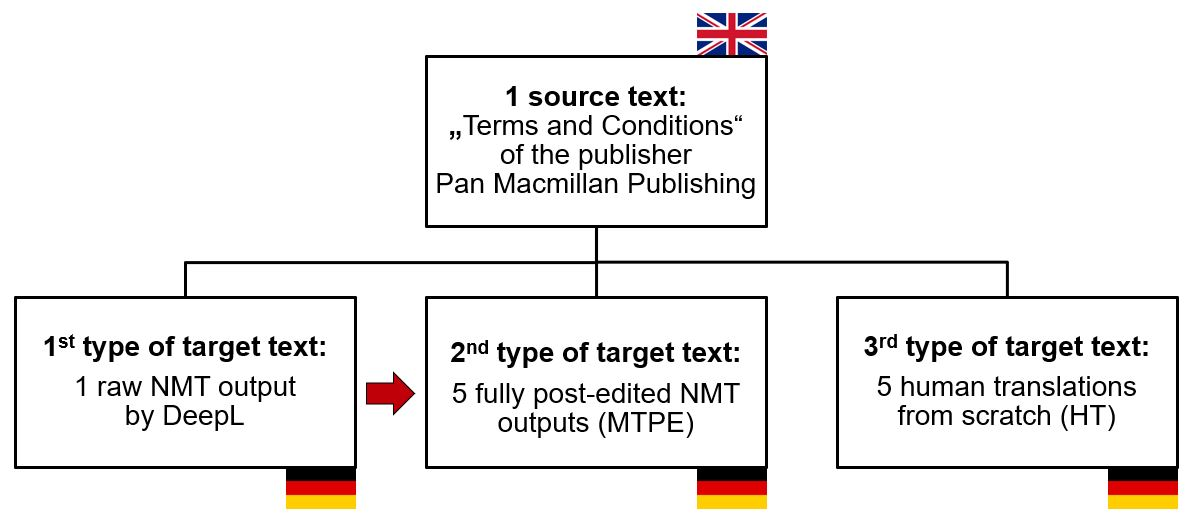

(*three different translation scenarios from English into German: NMT, MTPE, HT*)

---

# 0 Houskeeping

Before we dive into the analysis, we need to make sure that our notebook is set up properly.

First, run the code below to clone the DataLit<sup>MT</sup> GitHub Repository to access all necessary files.


In [ ]:
!git clone https://github.com/ITMK/DataLitMT

Now we change the directory to our *machine_translationese_post-editese*/documents folder to directly access the documents in our notebook and check the content in our *documents* folder.

In [ ]:
%cd /content/DataLitMT/learning_resources/machine_translationese_post-editese/documents/
!ls

/content/DataLitMT/learning_resources/machine_translationese_post-editese/documents
source_EN.docx	       target_DE_HT_B8.docx    target_DE_MTPE_A3.docx
target_DE_HT_B10.docx  target_DE_HT_B9.docx    target_DE_MTPE_A4.docx
target_DE_HT_B6.docx   target_DE_MTPE_A1.docx  target_DE_MTPE_A5.docx
target_DE_HT_B7.docx   target_DE_MTPE_A2.docx  target_DE_NMT.docx


We also need to install the two libraries docx2txt and LexicalRichness.

**About docx2txt**: Our target texts are saved in word files (.docx). To access the texts in the files, we need to extract them, which is where docx2txt comes in. It's a python-based utility for extracting text (and images) from docx files. It was developed by Ankush Shah, you can check out his repository [here](https://github.com/ankushshah89/python-docx2txt). We're using docx2txt in chapter 1.

**About LexicalRichness**: This is a small python module for calculating the range and variety of vocabulary deployed in a text by a writer/speaker. If you want to know more about this model, you can check out the repository [here](https://github.com/LSYS/LexicalRichness). We're using it in chapter 2 to assess the lexical variety of our target texts.


In [ ]:
!pip install docx2txt
!pip install lexicalrichness

That's it. You're ready to go!

# 1 Accessing Our Files

Since the files in our repository are Word files (.docx), we need to extract the texts from the files. To easily access the texts as we go along, we can save them in *variables*:

*   *text_NMT* is the NMT output
*   *text_A1* to *text_A5* are post-edited outputs (MTPE)
*   and *text_B6* to *text_B10* are human translations from scratch (HT)

Run the two code cells below.

In [ ]:
import docx2txt

In [ ]:
text_NMT = docx2txt.process("target_DE_NMT.docx")

text_A1 = docx2txt.process("target_DE_MTPE_A1.docx")
text_A2 = docx2txt.process("target_DE_MTPE_A2.docx")
text_A3 = docx2txt.process("target_DE_MTPE_A3.docx")
text_A4 = docx2txt.process("target_DE_MTPE_A4.docx")
text_A5 = docx2txt.process("target_DE_MTPE_A5.docx")

text_B6 = docx2txt.process("target_DE_HT_B6.docx")
text_B7 = docx2txt.process("target_DE_HT_B7.docx")
text_B8 = docx2txt.process("target_DE_HT_B8.docx")
text_B9 = docx2txt.process("target_DE_HT_B9.docx")
text_B10 = docx2txt.process("target_DE_HT_B10.docx")

# Group all texts together in a list 'target_texts'
target_texts = [text_NMT, text_A1, text_A2, text_A3, text_A4, text_A5, text_B6, text_B7, text_B8, text_B9, text_B10]

# 2 Lexical Variety

In this section, we would like to find out how lexically diverse the vocabularies of our target texts are (this is called *lexical variety*, also referred to as *lexical diversity*/*richness*, etc.). For example, texts which use only one word per concept (e.g. always referring to the concept EASY using the word *easy*) will be less lexically diverse than texts using different synonyms per concept (e.g. referring to the concept EASY using the synonyms *easy* and *simple*).

# 2.1 Calculating the Type-Token Ratio

In order to measure the lexical variety of our texts, we first need to count their **tokens** (total number of words) and their **types** (number of different word forms). We then divide types by tokens to get the [type-token ratio (TTR)](https://www.sketchengine.eu/my_keywords/type-token-ratio-ttr/), which is a measure of lexical variety: The higher the TTR, the higher the lexical variety. Let's take a look at one of the post-edited texts, A1 for example. Run the two cells below to calculate the TTR for text A1.

In [ ]:
from lexicalrichness import LexicalRichness

In [ ]:
lex_A1 = LexicalRichness(text_A1)

# Return word count (tokens)
result1 = lex_A1.words
print("Number of tokens of text A1:", str(result1))

# Return unique word count (types)
result2 = lex_A1.terms
print("Number of types of text A1:", str(result2))

# Return type-token ratio (TTR)
result3 = lex_A1.ttr
print("Type-token ratio of text A1:", str(result3))

Number of tokens of text A1: 301
Number of types of text A1: 159
Type-token ratio of text A1: 0.5282392026578073


The results show that the first post-edited text (text_A1) has 301 tokens, 159 types and a type-token ratio of around 0.528. So, now we know how to assess the lexical variety of a given text. However, to get meaningful data for our analysis, we need to do this for all our target text files and compare the results. 

The following code does exactly the same as the one above, but for all texts.

In [ ]:
tokens = []
types = []
TTR = []

for element in target_texts: 
  tokens.append(LexicalRichness(element).words)
  types.append(LexicalRichness(element).terms)
  TTR.append(LexicalRichness(element).ttr)

print("Number of tokens:", tokens)
print("Number of types:", types)
print("Type-token ratio:", TTR)

Number of tokens: [287, 301, 261, 276, 301, 282, 283, 248, 292, 303, 313]
Number of types: [143, 159, 142, 138, 151, 140, 159, 141, 161, 150, 168]
Type-token ratio: [0.49825783972125437, 0.5282392026578073, 0.5440613026819924, 0.5, 0.5016611295681063, 0.49645390070921985, 0.5618374558303887, 0.5685483870967742, 0.5513698630136986, 0.49504950495049505, 0.536741214057508]


**Note**

The first element of the tokens list, *tokens[0]* (count starts at 0), refers to the first element in the target_texts list, so to *text_NMT*. So, we can see that the NMT output has 287 tokens. The second element of the tokens list, *tokens[1]*, refers to the second element in the target_texts list, i.e., to *text_A1*, and so on. Therefore, *tokens[0] = text_NMT* and *tokens[1] = text_A1*, etc. We'll be using this method to refer to the texts for further calculations in this notebook.

Also, please note that deciding which tools to use for your analysis will affect your analysis results, because different tools may employ different methods for tokenizing text (for more information on this, see section 3.7 in [Bird et al. 2009](https://www.nltk.org/book/ch03.html#sec-tokenization)). This means that different natural language processing/corpus analysis tools – such as [AntConc](https://www.laurenceanthony.net/software/antconc/), [Sketch Engine](https://www.sketchengine.eu/), [Natural Language Toolkit](https://www.nltk.org/) or [spaCy](https://spacy.io/) – may display different numbers of types and tokens for the same texts.

# 2.2 Visualising the Results

Numbers and values in lists can sometimes be a bit difficult to interpret. Therefore, we recommend visualising your data in tables or charts to make the analysis results more tangible. 

The following code visualises our analysis data as a table for a quick overview.

But first, we need to import the necessary libraries to help our notebook visualise data. [Matplotlib](https://matplotlib.org/) is the most common library for creating visualisations in Python. Matplotlib is ideal to visualise (plot, graph) data and there is a lot of explanatory material available online. Run the two code cells below to import Matplotlib and create a table containing our data.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

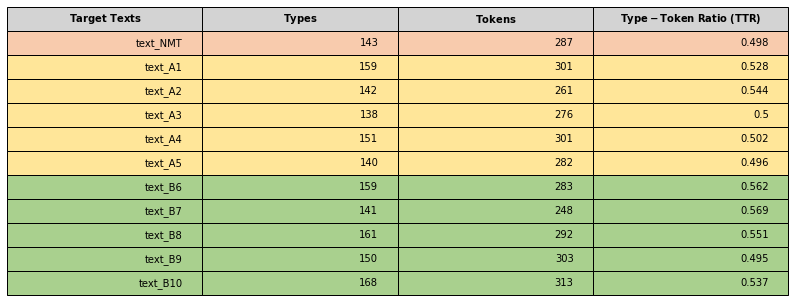

In [ ]:
# Plot table to visualise the analyis results

fig, ax = plt.subplots(figsize=(14,1))

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

target_texts_titles = ['text_NMT', 'text_A1', 'text_A2', 'text_A3', 'text_A4', 'text_A5', 'text_B6', 'text_B7', 'text_B8', 'text_B9', 'text_B10']

data = [[target_texts_titles[0], types[0], tokens[0], round(TTR[0], 3)], # we round the TTR values to 3 decimal places
        [target_texts_titles[1], types[1], tokens[1], round(TTR[1], 3)],
        [target_texts_titles[2], types[2], tokens[2], round(TTR[2], 3)],
        [target_texts_titles[3], types[3], tokens[3], round(TTR[3], 3)],
        [target_texts_titles[4], types[4], tokens[4], round(TTR[4], 3)],
        [target_texts_titles[5], types[5], tokens[5], round(TTR[5], 3)],
        [target_texts_titles[6], types[6], tokens[6], round(TTR[6], 3)],
        [target_texts_titles[7], types[7], tokens[7], round(TTR[7], 3)],
        [target_texts_titles[8], types[8], tokens[8], round(TTR[8], 3)],
        [target_texts_titles[9], types[9], tokens[9], round(TTR[9], 3)],
        [target_texts_titles[10], types[10], tokens[10], round(TTR[10], 3)]]


labels = ['$\\bf{Target}$ $\\bf{Texts}$', '$\\bf{Types}$', '$\\bf{Tokens}$', '$\\bf{Type-Token}$ $\\bf{Ratio}$ $\\bf{(TTR)}$']
#$\\bf{text_NMT}$

# colouring the table is completely optional
colours = [["#F8CBAD", "#F8CBAD","#F8CBAD", "#F8CBAD"], # red for the NMT output (NMT)
          ["#FFE699", "#FFE699","#FFE699", "#FFE699"], # yellow for the post-edited NMT outputs (MTPE)
          ["#FFE699", "#FFE699","#FFE699", "#FFE699"],
          ["#FFE699", "#FFE699","#FFE699", "#FFE699"],
          ["#FFE699", "#FFE699","#FFE699", "#FFE699"],
          ["#FFE699", "#FFE699","#FFE699", "#FFE699"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E"], # green for the human translations (HT)
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E"]]

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText = data, colLabels = labels, loc="center", colColours = ["lightgrey"] * 4, cellColours = colours)

table.scale(1, 2)

plt.show()

This is already a much clearer representation of our data compared to our initial representation. However, before interpreting the results of our analysis, we will first create a graphical representation of the data.

**Graphical Visualisation**

Here, we will visualise the numbers of types and tokens for each text in a line chart, which may support our subsequent data interpretation. Run the cell below to create the chart.

<ipython-input-33-5e99f1e03ae4>:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.vlines(x=[(0.5, 0.5), (5.5, 5.5)], ymin=0, ymax=350, colors='purple', ls='--', lw=2, label='vline_multiple - full height') # adding dotted lines between the NMT text, the MTPE texts, and the HT texts for clarity


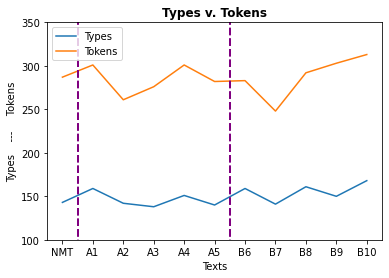

<Figure size 360x360 with 0 Axes>

In [ ]:
## Plotting Types vs. Tokens

plt.title('Types v. Tokens', fontweight='bold')
plt.xlabel('Texts')
plt.ylabel('Types    ---     Tokens')

target_texts_titles_short = ['NMT', 'A1', 'A2', 'A3', 'A4', 'A5', 'B6', 'B7', 'B8', 'B9', 'B10']

x = target_texts_titles_short
y1 = types[0], types[1], types[2], types[3], types[4], types[5], types[6], types[7], types[8], types[9], types[10]
y2 = tokens[0], tokens[1], tokens[2], tokens[3], tokens[4], tokens[5], tokens[6], tokens[7], tokens[8], tokens[9], tokens[10]

plt.plot(x, y1) # Types: blue line
plt.plot(x, y2) # Tokens: orange line
plt.legend(['Types', 'Tokens'])
plt.ylim(100, 350)      # Note here: limits were set so that the graph (y-axis) starts at 100 and not at zero!
plt.vlines(x=[(0.5, 0.5), (5.5, 5.5)], ymin=0, ymax=350, colors='purple', ls='--', lw=2, label='vline_multiple - full height') # adding dotted lines between the NMT text, the MTPE texts, and the HT texts for clarity

plt.figure(figsize=(5, 5))
plt.show()

So, what does this chart actually show? On the x-axis, we see our different target texts (remember, A1 to A5 are our post-edited MT outputs and B6 to B10 are our human from-scratch translations). The y-axis shows the number of types/tokens. The blue line represents the number of types and the orange line represents the number of tokens. In this chart, we can see that **B10** (HT) has the highest number of both types and tokens. **B7** (HT), on the other hand, has the lowest number of tokens and also a very low number of types. 


Now, that’s all very nice, but this chart doesn’t tell us a lot about lexical variety yet. Instead, we need to visualise the type-token ratio for each text. Run the cell below to do so.

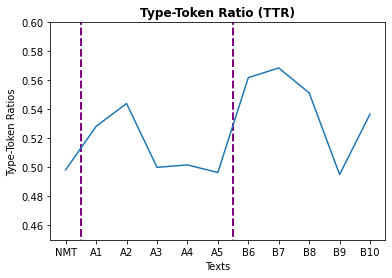

<Figure size 360x360 with 0 Axes>

In [ ]:
## Plotting Type-Token Ratio (TTR)

plt.title('Type-Token Ratio (TTR)', fontweight='bold')
plt.xlabel('Texts')
plt.ylabel('Type-Token Ratios')

x = target_texts_titles_short
y = TTR[0], TTR[1], TTR[2], TTR[3], TTR[4], TTR[5], TTR[6], TTR[7], TTR[8], TTR[9], TTR[10]

plt.ylim(0.45, 0.6)    # Note here: limits were set so that the graph (y-axis) starts at 0.45 and not at zero!
plt.vlines(x=[(0.5, 0.5), (5.5, 5.5)], ymin=0, ymax=0.6, colors='purple', ls='--', lw=2, label='vline_multiple - full height') # adding dotted lines between the NMT text, the MTPE texts, and the HT texts for clarity
plt.plot(x, y)

plt.figure(figsize=(5, 5))
plt.show()

In this chart, we can see that two of our post-edited texts (**A1** and **A2**) have higher type-token ratios (and therefore a higher lexical variety) than our NMT output. **A3**, **A4** and **A5** show relatively similar values compared to the NMT output, as does the human translation **B9** (slightly surprising and different from the result obtained in our Basic Level calculations, as can be seen in the data available [here](https://github.com/ITMK/DataLitMT/tree/main/learning_resources/MT_priming)). We can also see that **B6**, **B7** and **B8** have higher TTRs than the NMT output and all post-edited texts. **B10** also has a relatively high TTR and is only just beaten by A2.

# 2.3 Interpreting the Results

Lexical variety is relatively low in the NMT output, probably because, as [Vanmassenhove et al. (2019)](https://aclanthology.org/W19-6622/) point out, NMT systems tend to prefer the translation solutions most frequently used in their training data and to ignore less frequent words. In fact, this may cause source text words that are relatively similar in meaning to be translated with the same target text word (see table below: *advertise and promote* --> *werben und werben*).

Post-editors may (or may not as we've seen in the chart above) add lexical variety to some degree. In the table below, for example, we can see that post-editor **A5** corrected the mistake in the NMT output and used the nouns *Reklame* and *Werbung* as equivalents for the source text words *promote* and *advertise*. Apart from that, the A5 target sentence is relatively similar to the NMT output, resulting in a similar lexical variety of NMT and A5 (at text level). 

In comparison, translator **B7** shortened the sentence by using a single noun (*Werbeaktivitäten*) for the source text expressions (*promote and advertise*, *engage in ... marketing*). At text level, B7 has a higher lexical variety than the NMT output. 

As we've pointed out, our analysis results show some exceptions to the tendencies described in the introduction, with A3 to A5 and B9 being outliers. Previous studies have shown clearer results – For example, in the study of [Toral (2019)](https://aclanthology.org/W19-6627/), the lexical variety was found to be lowest in NMT, higher in post-editing (MTPE) and highest in human translation (HT). It should be noted, however, that Toral used a much larger sample size than our current analysis, which we conduct primarily for the purpose of illustration.



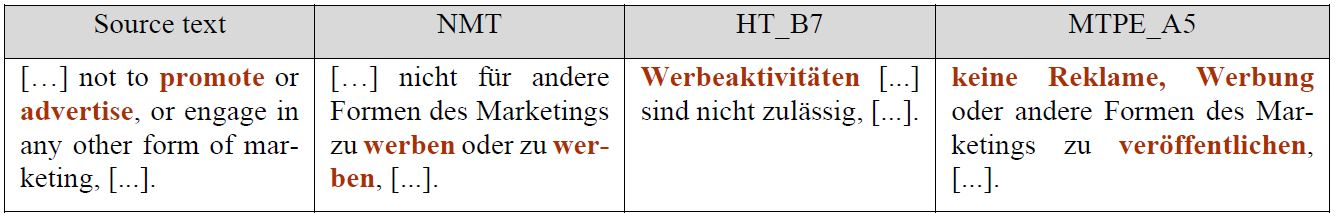

(*DeepL translated two similar source text words with the same target text word, while the post-editor and translator used different strategies.*)

# 3 Lexical Density

Now that you’ve learned more about lexical variety, we’ll move on to lexical density. Lexical density describes the amount of information in a text. This can be assessed by calculating the ratio between:
1.	the number of content words
2.	and the overall number of tokens in a text

We already know the number of tokens for each text, but what exactly are **content words**? Content words carry semantic content and contribute to the meaning of the sentence in which they occur. For example, Toral (2019) counts nouns, verbs, adjectives, and adverbs as content words. But does that include all kinds of verbs? What about auxiliary verbs? They don’t add much meaning to a sentence, do they? And what about proper nouns? Depending on what you count as content words, the values for lexical density can differ widely (comparable to different methods of tokenization, which can result in different values for lexical variety, as discussed above). Therefore, when calculating automatic measures such as lexical variety or density, try to be as transparent as possible about your method. In our analysis, we’re counting as content words **nouns**, **proper nouns**, **verbs** (but no auxiliary verbs), **adverbs** and **adjectives**.

# 3.1 Data Preparation

To calculate the lexical density of our target texts, we're using [spaCy](https://spacy.io/), a free, open-source library for advanced Natural Language Processing (NLP) in Python. If you want to know more about this tool, check out the [spaCy 101 page](https://spacy.io/usage/spacy-101).

To get started, we need to import the [German spaCy model](https://spacy.io/models/de), more specifically the de_core_news_sm version 3.4.0, to tag our texts with part-of-speech (POS) information (e.g. Website NOUN). After importing the model, we can define the texts we want to tag and group them in a list for further processing. Run the two cells below to do so. 

In [ ]:
import spacy 
!python -m spacy download de_core_news_sm
nlp = spacy.load("de_core_news_sm")

In [ ]:
# Define texts for pos_tagging

text_NMT_tagged = nlp(text_NMT)
text_A1_tagged = nlp(text_A1)
text_A2_tagged = nlp(text_A2)
text_A3_tagged = nlp(text_A3)
text_A4_tagged = nlp(text_A4)
text_A5_tagged = nlp(text_A5)
text_B6_tagged = nlp(text_B6)
text_B7_tagged = nlp(text_B7)
text_B8_tagged = nlp(text_B8)
text_B9_tagged = nlp(text_B9)
text_B10_tagged = nlp(text_B10)

# Group all tagged_texts in a list 'tagged_texts'
tagged_texts = [text_NMT_tagged, text_A1_tagged, text_A2_tagged, text_A3_tagged, text_A4_tagged, text_A5_tagged, text_B6_tagged, text_B7_tagged, text_B8_tagged, text_B9_tagged, text_B10_tagged]

# 3.2 Understanding the Details

For illustration purposes, you can print the tokens and POS tags for one of the tagged texts, A1 for example, by running the cell below. 

As you'll see, the code prints the tokens vertically and assigns a POS tag to each of them (to their right). A more comprehensive discussion of POS tags in spaCy and how to interpret them can be found in [this article](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/).

In [ ]:
for token in text_A1_tagged:
    print(token.text, token.pos_)

Allgemeine ADJ
Geschäftsbedingungen NOUN


 SPACE
1. ADV
Nutzung NOUN
unserer DET
Website NOUN


 SPACE
1.1 NUM
Mit ADP
der DET
Nutzung NOUN
dieser DET
Website NOUN
erklären VERB
Sie PRON
sich PRON
mit ADP
den DET
Allgemeinen ADJ
Geschäftsbedingungen NOUN
( PUNCT
im ADP
Folgenden NOUN
: PUNCT
„ PUNCT
diese DET
Bedingungen NOUN
“ PUNCT
) PUNCT
sowie CCONJ
unserer DET
Datenschutzrichtlinie NOUN
einverstanden ADV
, PUNCT
und CCONJ
wenn SCONJ
Sie PRON
eine DET
bestimmte ADJ
Dienstleistung NOUN
wie ADP
unseren DET
Buchladen NOUN
nutzen VERB
, PUNCT
unterliegen VERB
Sie PRON
dabei ADV
allen DET
zusätzlichen ADJ
Bedingungen NOUN
, PUNCT
die PRON
auf ADP
diese DET
jeweilige ADJ
Dienstleistung NOUN
anwendbar ADV
sind AUX
. PUNCT


 SPACE
Bitte NOUN
lesen VERB
Sie PRON
sich PRON
diese DET
Bedingungen NOUN
gründlich ADV
durch ADP
, PUNCT
da SCONJ
sie PRON
sehr ADV
wichtig ADV
sind AUX
. PUNCT


 SPACE
Nutzen VERB
Sie PRON
diese DET
Website NOUN
nicht PART
, PUNCT
wenn SCONJ
Sie PRON
mit ADP
diese

Now that the text **A1** is tagged, we can count its content words.
As outlined earlier, we're considering the following tags or parts of speech: NOUN, PROPN (proper noun), VERB, ADJ (adjective) and ADV (adverb). The numbers of the different tags will be added together to obtain the **content word count** for the text. Run the cell below to do so.

In [ ]:
all_content_words = []
for token in text_A1_tagged:
    all_content_words.append(token.pos_)

# Now count only the nouns, proper nouns, verbs, adjectives and adverbs
content_words_A1 = sum([all_content_words.count('ADV'), all_content_words.count('NOUN'), all_content_words.count('PROPN'), all_content_words.count('ADJ'), all_content_words.count('VERB')])
print("Content word count for text A1:", content_words_A1)

Content word count for text A1: 146


**Note: Errors May Occur**

As you may have noticed in the POS tagging above, some errors occurred, specifically for tagging the enumeration. For example, *Point 1.* is falsely tagged as an adverb (ADV). This error can be seen throughout the text and in total, seven POS tags are incorrect. Since we count adverbs as content words, but not numbers, this distorts the content word count slightly. Therefore, by running the cell below, we're calculating an error for this text and project this error onto the content word counts for all texts (see section 3.3).

In [ ]:
# Error of lexical content word count for text A1 
# 7 wrong pos-tags out of a total of 146 lexical content words

pos_error = (7 / 146) * 100
print("A1 pos-error in %:", pos_error)

A1 pos-error in %: 4.794520547945205


# 3.3 Counting the Content Words

Once we've understood this, we can count the content words for each text. The following code cell essentially repeats what we just did for the text **A1**, but for all target texts individually.

In [ ]:
content_words = []
for (num,element) in enumerate(tagged_texts):
  token_list = []
  for token in element:
    token_list.append(token.pos_)
    contentwords_count = sum([token_list.count('ADV'), token_list.count('NOUN'), token_list.count('PROPN'), token_list.count('ADJ'), token_list.count('VERB')])
  content_words.append(contentwords_count)
print(f"Content Words:", content_words)

Content Words: [133, 146, 132, 132, 142, 133, 145, 139, 149, 154, 154]


From the content_words list, we can now define each content word value as a variable for each text to enable further processing.

In [ ]:
content_words_NMT = content_words[0]
content_words_A1 = content_words[1]
content_words_A2 = content_words[2]
content_words_A3 = content_words[3]
content_words_A4 = content_words[4]
content_words_A5 = content_words[5]
content_words_B6 = content_words[6]
content_words_B7 = content_words[7]
content_words_B8 = content_words[8]
content_words_B9 = content_words[9]
content_words_B10 = content_words[10]

# 3.4 Calculating the Lexical Density

Now that we know the individual numbers of content words in our texts, we can calculate the lexical density for each text by dividing the number of content words by the number of tokens per text. We then save the results in a list to make it easier to visualise them later. Run the cell below.

In [ ]:
density_NMT = content_words_NMT / tokens[0]
density_A1 = content_words_A1 / tokens[1]
density_A2 = content_words_A2 / tokens[2]
density_A3 = content_words_A3 / tokens[3]
density_A4 = content_words_A4 / tokens[4]
density_A5 = content_words_A5 / tokens[5]
density_B6 = content_words_B6 / tokens[6]
density_B7 = content_words_B7 / tokens[7]
density_B8 = content_words_B8 / tokens[8]
density_B9 = content_words_B9 / tokens[9]
density_B10 = content_words_B10 / tokens[10]

# Group all lexical densities in a list 'lexical_densities'
lexical_densities = [density_NMT, density_A1, density_A2, density_A3, density_A4, density_A5, density_B6, density_B7, density_B8, density_B9, density_B10]
print("Lexical densities:", lexical_densities)

Lexical densities: [0.4634146341463415, 0.4850498338870432, 0.5057471264367817, 0.4782608695652174, 0.4717607973421927, 0.4716312056737589, 0.5123674911660777, 0.5604838709677419, 0.5102739726027398, 0.5082508250825083, 0.49201277955271566]


As outlined in section 3.2, each content word count will have an error of 4.79% to account for incorrectly assigned POS tags (e.g., 1. ADV). To facilitate later visualisation, we save the values in a list again.

In [ ]:
density_error_NMT = (density_NMT/100)*pos_error
density_error_A1 = (density_A1/100)*pos_error
density_error_A2 = (density_A2/100)*pos_error
density_error_A3 = (density_A3/100)*pos_error
density_error_A4 = (density_A4/100)*pos_error
density_error_A5 = (density_A5/100)*pos_error
density_error_B6 = (density_B6/100)*pos_error
density_error_B7 = (density_B7/100)*pos_error
density_error_B8 = (density_B8/100)*pos_error
density_error_B9 = (density_B9/100)*pos_error
density_error_B10 = (density_B10/100)*pos_error

# Group all density errors in a list 'density_errors'
density_errors = [density_error_NMT, density_error_A1, density_error_A2, density_error_A3, density_error_A4, density_error_A5, density_error_B6, density_error_B7, density_error_B8, density_error_B9, density_error_B10]
print("Density errors:", density_errors)

Density errors: [0.02221850985633144, 0.02325581395348837, 0.024248149897653913, 0.022930315664085762, 0.022618668365721566, 0.02261245506655008, 0.02456556464494893, 0.02687251436146707, 0.024465190467254642, 0.024368190243681902, 0.0235896538141713]


# 3.5 Visualising the Results

To make the results more tangible, we again recommend visualising them in tables and charts. First, we visualise the data (specifically the previously calculated content word counts, lexical densities and density errors) as a table for a quick overview.

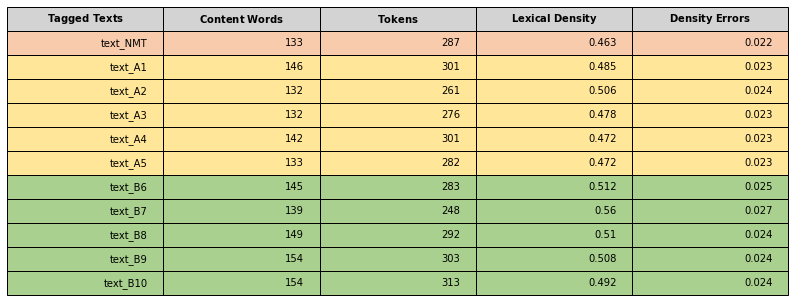

In [ ]:
fig, ax = plt.subplots(figsize=(14,1)) 

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

data = [[target_texts_titles[0], content_words[0], tokens[0], round(lexical_densities[0], 3), round(density_errors[0], 3)], # we round the lexical densities and errors to 3 decimal places
        [target_texts_titles[1], content_words[1], tokens[1], round(lexical_densities[1], 3), round(density_errors[1], 3)],
        [target_texts_titles[2], content_words[2], tokens[2], round(lexical_densities[2], 3), round(density_errors[2], 3)],
        [target_texts_titles[3], content_words[3], tokens[3], round(lexical_densities[3], 3), round(density_errors[3], 3)],
        [target_texts_titles[4], content_words[4], tokens[4], round(lexical_densities[4], 3), round(density_errors[4], 3)],
        [target_texts_titles[5], content_words[5], tokens[5], round(lexical_densities[5], 3), round(density_errors[5], 3)],
        [target_texts_titles[6], content_words[6], tokens[6], round(lexical_densities[6], 3), round(density_errors[6], 3)],
        [target_texts_titles[7], content_words[7], tokens[7], round(lexical_densities[7], 3), round(density_errors[7], 3)],
        [target_texts_titles[8], content_words[8], tokens[8], round(lexical_densities[8], 3), round(density_errors[8], 3)],
        [target_texts_titles[9], content_words[9], tokens[9], round(lexical_densities[9], 3), round(density_errors[9], 3)],
        [target_texts_titles[10],content_words[10], tokens[10], round(lexical_densities[10], 3), round(density_errors[10], 3)]]

labels = ['$\\bf{Tagged}$ $\\bf{Texts}$', '$\\bf{Content}$ $\\bf{Words}$', '$\\bf{Tokens}$', '$\\bf{Lexical}$ $\\bf{Density}$', '$\\bf{Density}$ $\\bf{Errors}$']

# colouring the table is completely optional
colours = [["#F8CBAD", "#F8CBAD","#F8CBAD", "#F8CBAD", "#F8CBAD"], # red for the NMT output (NMT)
          ["#FFE699", "#FFE699","#FFE699", "#FFE699", "#FFE699"], # yellow for the post-edited NMT outputs (MTPE)
          ["#FFE699", "#FFE699","#FFE699", "#FFE699", "#FFE699"],
          ["#FFE699", "#FFE699","#FFE699", "#FFE699", "#FFE699"],
          ["#FFE699", "#FFE699","#FFE699", "#FFE699", "#FFE699"],
          ["#FFE699", "#FFE699","#FFE699", "#FFE699", "#FFE699"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E", "#A9D08E"], # green for the human translations (HT)
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E", "#A9D08E"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E", "#A9D08E"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E", "#A9D08E"],
          ["#A9D08E", "#A9D08E","#A9D08E", "#A9D08E", "#A9D08E"]]

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data,colLabels=labels,loc="center",colColours = ["lightgrey"] * 5, cellColours = colours)

table.scale(1, 2)

plt.show()

**Graphical Visualisation**

Then, we visualise the lexical density of the individual texts in a chart. The following code will not only visualise the lexical densities but also respective error bars for each text. The error bars represent the variability of our data and account for the incorrect POS tags.

<ipython-input-36-e6ac407a798a>:14: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.vlines(x=[(0.5, 0.5), (5.5, 5.5)], ymin=0, ymax=0.6, colors='purple', ls='--', lw=2, label='vline_multiple - full height') # adding dotted lines between the NMT text, the MTPE texts, and the HT texts for clarity


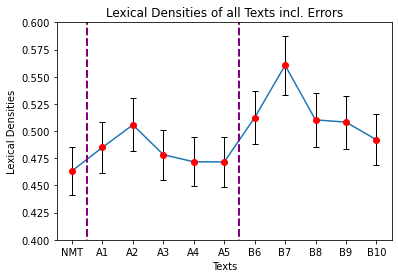

<Figure size 360x360 with 0 Axes>

In [ ]:
## Plotting Lexical Density

plt.title('Lexical Densities of all Texts incl. Errors')
plt.xlabel('Texts')
plt.ylabel('Lexical Densities')

x = target_texts_titles_short
y = lexical_densities

plt.plot(x, y)
plt.errorbar(x, y, yerr = density_errors, fmt = 'o',color = 'red', 
            ecolor = 'black', elinewidth = 1, capsize=3)
plt.ylim(0.4, 0.6)      # Note here: limits were set so that the graph (y-axis) starts at 0.4 and not at zero!
plt.vlines(x=[(0.5, 0.5), (5.5, 5.5)], ymin=0, ymax=0.6, colors='purple', ls='--', lw=2, label='vline_multiple - full height') # adding dotted lines between the NMT text, the MTPE texts, and the HT texts for clarity

plt.figure(figsize=(5, 5))
plt.show()

In our chart, we can see that the **NMT** output has the lowest value for lexical density. The chart also shows that all post-edited texts (**A1**-**A5**) have a higher lexical density than the NMT output. However, **A3** to **A5** show relatively similar values compared to the NMT output.

The human translation **B7** has the highest lexical density. **B6**, **B8** and **B9** also score relatively high. **B10** is just beaten by the post-edited text **A2**, but it still has a higher lexical density than the other post-edited texts and the NMT output. Overall, the picture for lexical density is a bit more clear-cut than the picture for lexical variety.

In the introduction, we hypothesised that, given what we know about machine translationese and post-editese, lexical density should be lowest in raw NMT output, higher in post-edited NMT output and highest in human translations. Despite the exception of B10 and relatively high errors, our analysis results generally seem to confirm this (mind, however, the relatively small sample size used in our analysis). Note, however, that Toral (2019) is unsure whether the degree of lexical density represents a systematic difference between the different translation scenarios or not.


# 4 Conclusion

In conclusion, our data analysis mostly verified our hypothesis concerning lexical variety. It tends to be higher in HT than in NMT output and post-edited texts. This seems logical: It’s easier for translators to translate more freely and draw on a larger vocabulary in from-scratch translation because they do not have the target language suggestions of the NMT output as a reference (which may prime them). As NMT systems tend to favour translation solutions that are most frequently used in the training data, lexical variety may be reduced in raw MT output as less frequent words get “lost in translation” ([Vanmassenhove et al. 2019](https://aclanthology.org/W19-6622/)). This decrease in lexical variety can be described as a form of simplification, which was discussed as a potential translation universal (translationese) in the introduction. Therefore, we could say that machine translationese tends towards simplification.

Our assumptions about lexical density were also generally verified, with the picture even being a bit more clear-cut than for lexical variety. It tends to be lowest in raw NMT output, higher in MTPE and highest in HT.

Post-editing seems to counteract the machine translationese effects only to a certain extent, as, for both lexical variety and lexical density, the post-edited texts achieved results similar compared to the NMT output or were somewhat in between NMT and HT. Again, this could be both due to a priming effect by the MT output or due to external factors in the translation production network, such as time pressure or instructions to perform light instead of full post-editing.

But what does that mean for us as future translators? Since post-editing is increasingly implemented in the professional translation process, professional translators often find themselves in the role of post-editors. Since post-editing usually comes with a discount or similar methods to decrease translation costs, the MT output must often be edited to the desired level  of quality with as little effort as possible. To be able to do this without compromising final translation quality, professional translators should keep in mind that MT output exhibits patterns of machine translationese, which have to be compensated for by translators in order to avoid producing target texts that show instances of post-editese. Being aware of patterns of machine translationese and post-editese (and of potential MT-induced priming effects) as identified in translation studies, translators may be better equipped to spot and revise passages in the MT output requiring their human intervention in a more efficient manner. In this way, neural machine translation could fulfil its promise as a tool for enhancing translation productivity without compromising final translation quality.
